# Setting up report
*In order to analyse and report on the data, I have chose to use Jupyter notebook along with the Numpy,Pandas, Matplotlib and Seaborn. In order to use  these modules they needed to be imported into the notebook first as below.

In [2]:
#How to get column variables
print(titanicdataset.columns.values)

['Passengerid' 'Age' 'Fare' 'Sex' 'sibsp' 'Parch' 'Pclass' 'Embarked'
 'Survived']


In [3]:
#To get the first five rows of the dataset
titanicdataset.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [4]:
#To get the last five rows of the dataset
titanicdataset.tail()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
1304,1305,28.0,8.0500,0,0,0,3,2.0,0
1305,1306,39.0,108.9000,1,0,0,1,0.0,0
1306,1307,38.5,7.2500,0,0,0,3,2.0,0
1307,1308,28.0,8.0500,0,0,0,3,2.0,0
1308,1309,28.0,22.3583,0,1,1,3,0.0,0


In [5]:
#Get the all the information about the dataset
titanicdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Pclass       1309 non-null   int64  
 7   Embarked     1307 non-null   float64
 8   Survived     1309 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 92.2 KB


In [6]:
#Get the only numerical data(statistical information)
titanicdataset.describe()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1307.000000,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.385027,2.294882,1.492731,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.865560,0.837836,0.814626,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,9.000000,3.000000,2.000000,1.000000


In [7]:
#To identify the null value 
titanicdataset.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       2
Survived       0
dtype: int64

In [8]:
#To Identify the number of survivors
survival_count = titanicdataset.groupby("Survived")["Survived"].count()
survival_count

Survived
0    967
1    342
Name: Survived, dtype: int64

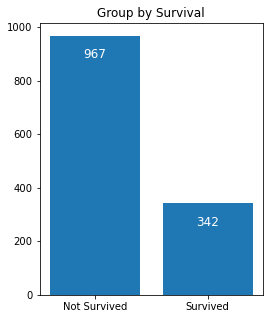

In [11]:
#Seeing the above result it is said that 967 passangers were not survived and 342 passangers were survived.
#Create a graph for survival 
%matplotlib inline

#Draw the graph for survival
plt.figure(figsize=(4,5))
plt.bar(survival_count.index, survival_count.values)
plt.title("Group by Survival")
plt.xticks([0,1],['Not Survived','Survived'])
for i, value in enumerate(survival_count.values):
    plt.text(i, value-70,str(value), fontsize=12,color='white',horizontalalignment='center',verticalalignment='center')
plt.show()

In [12]:
#Distribution for ticket, gender and embark

pclass_count = titanicdataset.groupby("Pclass")["Pclass"].count()
pclass_count

Pclass
1    323
2    277
3    709
Name: Pclass, dtype: int64

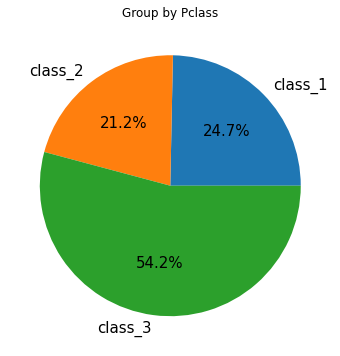

In [14]:
#Passanger class figure in pie chart
pclass_count = titanicdataset.groupby("Pclass")["Pclass"].count()
plt.figure(figsize=(6,6))
plt.title("Group by Pclass")
plt.pie(pclass_count.values,labels=['class_1','class_2','class_3'],
autopct ='%1.1f%%', textprops= {'fontsize':15})
plt.show()

In [17]:
#Age distribution 
#Get rid of null values
ages = titanicdataset[titanicdataset['Age'].notnull()]['Age'].values
ages_hist = np.histogram(ages,bins=[0,10,20,30,40,50,60,70,80,90])
ages_hist
ages_hist_labels = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90']

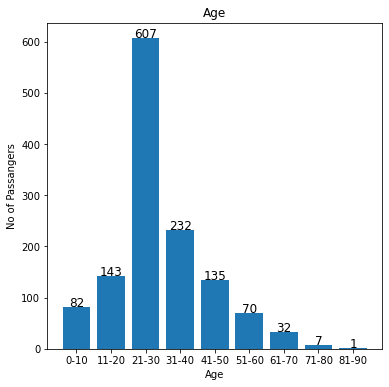

In [26]:
plt.figure(figsize=(6,6))
plt.title('Age')
plt.bar(ages_hist_labels,ages_hist[0])
plt.xlabel("Age")
plt.ylabel("No of Passangers")

for i, bin in zip(ages_hist[0],range(9)):
    plt.text(bin, i+8, str(int(i)),fontsize=12,horizontalalignment='center', verticalalignment='center')
plt.show()
    


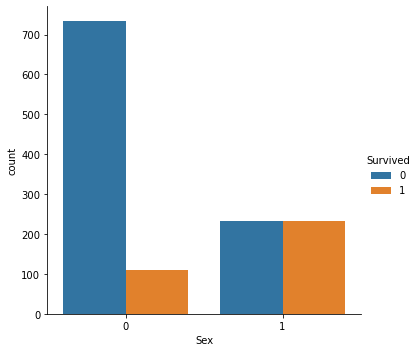

In [27]:
#import Seaborn to compare with more than two values
#get the graph for sex and survived
# 0=male, 1=Female

import seaborn as sns
sns.catplot(x= 'Sex',hue= 'Survived', kind= 'count', data = titanicdataset)

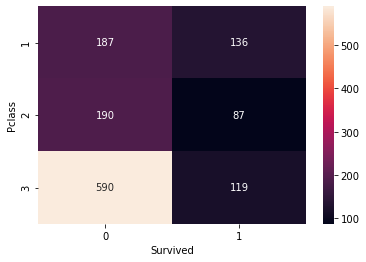

In [29]:
#Get the Heatmap between Pclass and Survival

group = titanicdataset.groupby(['Pclass','Survived'])
pclass_survived = group.size().unstack()

#Draw heatmap
sns.heatmap(pclass_survived, annot = True, fmt ='d')

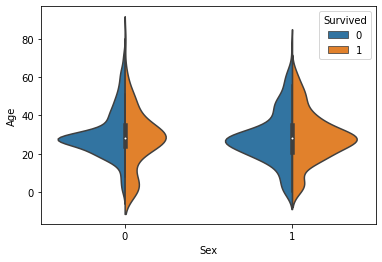

In [31]:
# Age vs Gender vs survived
sns.violinplot(x = 'Sex', y= 'Age', hue = 'Survived', data = titanicdataset, split=True )

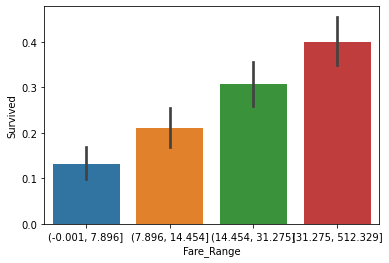

In [32]:
#barplot for fare in seaborn
#divided the bar plot into four different bins
titanicdataset['Fare_Range'] = pd.qcut(titanicdataset['Fare'],4)
#Barplot
sns.barplot(x='Fare_Range', y='Survived', data = titanicdataset)

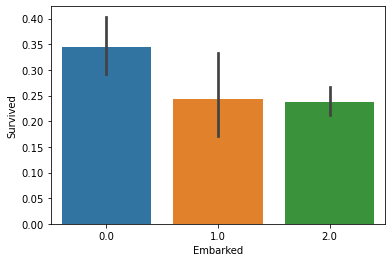

In [34]:
#Embarked Vs Survived
sns.barplot(x='Embarked', y='Survived', data= titanicdataset)